<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [67]:
df=pd.read_csv('DMV_Written_Tests.csv')

In [68]:
df.head() # first 5 rows

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [69]:
df.info() # datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [70]:
df.describe() # statistical overview

,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [71]:
df.isna().sum() # no null value

DMV_Test_1    0
DMV_Test_2    0
Results       0
dtype: int64

In [72]:
scores=df[['DMV_Test_1','DMV_Test_2']]
results=df.Results

In [73]:
scores.head()

,DMV_Test_1,DMV_Test_2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [74]:
results.head()

0    0
1    0
2    0
3    1
4    1
Name: Results, dtype: int64

### Task 3: Visualize the Data
---

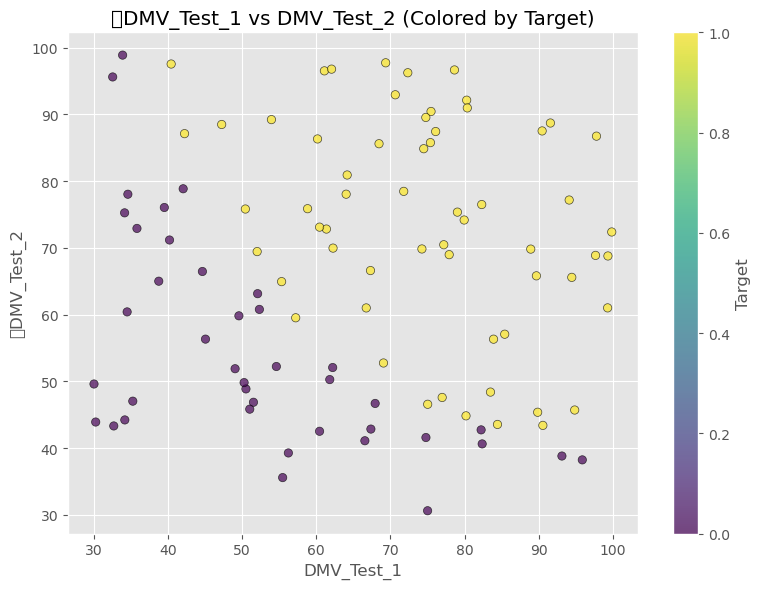

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(df['DMV_Test_1'], df['DMV_Test_2'], c=df['Results'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('	DMV_Test_1 vs DMV_Test_2 (Colored by Target)')
plt.xlabel('DMV_Test_1')
plt.ylabel('	DMV_Test_2')
plt.colorbar(label='Target')
plt.tight_layout()
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [76]:
def logistic_function(x):
      return 1/(1+np.exp(-x))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [77]:
def compute_cost(theta,x,y):
    m=len(y)
    y_pred=logistic_function(np.dot(x,theta))
    error=(y*np.log(y_pred))+(1-y)*np.log(1-y_pred)
    cost=-1/m*sum(error)
    gradient=1/m *np.dot(x.transpose(),(y_pred-y))
    return cost[0],gradient

In [78]:
# standardisation
mean_scores=np.mean(scores,axis=0)
std_scores=np.std(scores,axis=0)
scores=(scores-mean_scores)/std_scores

In [79]:
scores=pd.DataFrame(scores)
scores.head()

,DMV_Test_1,DMV_Test_2
0,-1.602248,0.638341
1,-1.826256,-1.207541
2,-1.539040,0.361294
3,-0.282101,1.086368
4,0.691528,0.493378


### Task 6: Cost and Gradient at Initialization
---

In [80]:


# Add bias term (column of ones) to the input matrix X
rows = scores.shape[0]
cols = scores.shape[1]
X = np.append(np.ones((rows, 1)), scores, axis=1)

# Convert results to NumPy array and reshape
y = results.values.reshape(rows, 1)

# Initialize theta
theta_init = np.zeros((cols + 1, 1))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost (cross-entropy) and gradients
def compute_cost(theta, X, y):
    m = len(y)
    predictions = sigmoid(X @ theta)  # Sigmoid function for probabilities
    # Cross-entropy loss
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    # Gradient
    gradient = (1 / m) * (X.T @ (predictions - y))
    return cost, gradient

# Calculate cost and gradients
cost, gradient = compute_cost(theta_init, X, y)
print('Cost at Initialisation:', cost)
print('Gradients at Initialisation:', gradient)


Cost at Initialisation: 0.6931471805599453
Gradients at Initialisation: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [81]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
     cost,gradient=compute_cost(theta,x,y)
     theta-=(alpha*gradient)
     costs.append(cost)
    return theta,costs
    

In [82]:
theta_final,costs=gradient_descent(X,y,theta_init,1,200)

In [83]:
print("theta after running gradient descent: ",theta)
print("cost after running gradient descent: ",costs[-1])


theta after running gradient descent:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
cost after running gradient descent:  0.20489382035120143


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0, 0.5, '$J(\\Theta)$')

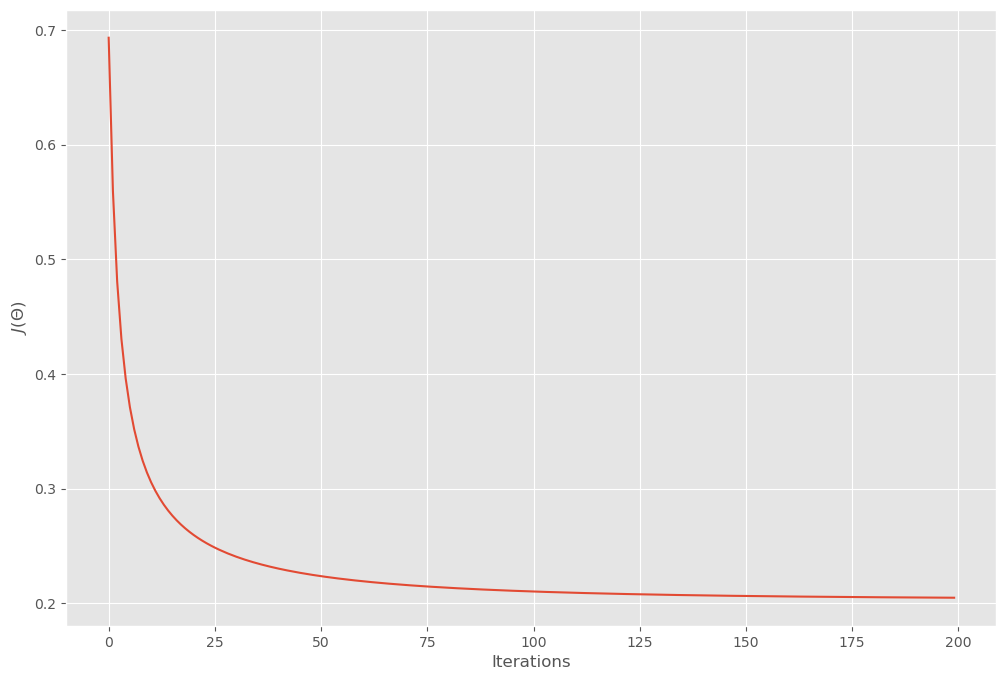

In [84]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [88]:
scores.head()
scores['target']=df['Results']

In [89]:
scores.head()

,DMV_Test_1,DMV_Test_2,target
0,-1.602248,0.638341,0
1,-1.826256,-1.207541,0
2,-1.539040,0.361294,0
3,-0.282101,1.086368,1
4,0.691528,0.493378,1


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [95]:
def predict (theta,x):
    results=x.dot(theta)
    return results>0

In [96]:
p=predict(theta,X)
print("Training Accuracy",sum(p==y)[0],"%")

Training Accuracy 89 %


In [101]:
test=np.array([50,70])
test=(test-mean_scores)/std_scores
test=np.append(np.ones(1),test)
prob=logistic_function(test.dot(theta))
print("A person who scores 50 and 70 on their DMV writeen tesst have a ",np.round(prob[0],2))

A person who scores 50 and 70 on their DMV writeen tesst have a  0.34
